In [1]:
import os
from pathlib import Path
import prettyprinter as pp

HOME = os.getcwd()

<h4>Make Validation Dataset from Train Data</h4>

In [2]:
from dataLoader import DataLoader

data_base_path = Path("dataset/KITTI")

train_image_path = os.path.join(data_base_path, 'images','train')
train_image_label = os.path.join(data_base_path,'labels')
categories = Path("dataset/object_classes.json")

data_loader = DataLoader(train_image_label, train_image_path, categories)
# data_loader.make_validation_set()

#create a .yaml file
# data_loader.make_yaml_file()


In [ ]:
import yaml

file_path = "dataset/data.yaml"

with open(file_path, "r") as file:
    data = yaml.safe_load(file)

pp.pprint(data)

<h4>Data Visualization</h4>

In [ ]:
from dataExploration import DataExploration

train_path = Path("dataset/modified/train")

data_exploration = DataExploration(train_path)

#visualize images
data_exploration.visualize_image()

<h4>Detection</h4>

In [5]:
from YOLOv8Detection import YOLOv8Detection

data_src='dataset/data.yaml'
test_data_src = Path("dataset/KITTI/images/test")
best_model_dir = Path("model_output/YOLO_detection/Object Labeling2/weights/best.pt")


yoloV8_det = YOLOv8Detection(data_src)

#train
# yoloV8_det.train()

#evaluate
# yoloV8_det.evaluate()

#test
# yoloV8_det.prediction(best_model_dir, test_data_src)
# yoloV8_det.plot_predicted_images()

<h5>Detection Evaluation Metrices</h5>

In [6]:
best_model_dir = Path("model_output/YOLO_detection/Object Labeling2/weights/best.pt")
# yoloV8_det.evaluate(best_model_dir)

# yoloV8_det.result_visualization()

<h4>Segmentation</h4>

In [ ]:
from YOLOv8Segmentation import YOLOv8Segmentation

data_src='dataset/segment_data.yaml'

yolo_segmentation = YOLOv8Segmentation(data_path=data_src)

"""Pre-Train Model"""
#train
# yolo_segmentation.train()



#predict
yolo_segmentation.prediction(test_path=Path('dataset/KITTI/images/test'))
yolo_segmentation.plot_predicted_images()

<h4>Road Segmentation</h4>

Epoch 1/7
2/2 [==============================] - 71s 18s/step - loss: 0.6925 - accuracy: 0.0016 - val_loss: 0.6837 - val_accuracy: 0.0022
Epoch 2/7
2/2 [==============================] - 49s 15s/step - loss: 0.6774 - accuracy: 0.0024 - val_loss: 0.6560 - val_accuracy: 0.0022
Epoch 3/7
2/2 [==============================] - 47s 16s/step - loss: 0.6501 - accuracy: 0.0024 - val_loss: 0.6473 - val_accuracy: 0.0022
Epoch 4/7
2/2 [==============================] - 48s 15s/step - loss: 0.6469 - accuracy: 0.0024 - val_loss: 0.6946 - val_accuracy: 0.0022
Epoch 5/7
2/2 [==============================] - 44s 15s/step - loss: 0.6465 - accuracy: 0.0024 - val_loss: 0.7257 - val_accuracy: 0.0022
Epoch 6/7
2/2 [==============================] - 47s 17s/step - loss: 0.6420 - accuracy: 0.0024 - val_loss: 0.8238 - val_accuracy: 0.0022
Epoch 7/7
1/1 [==============================] - 0s 450ms/step


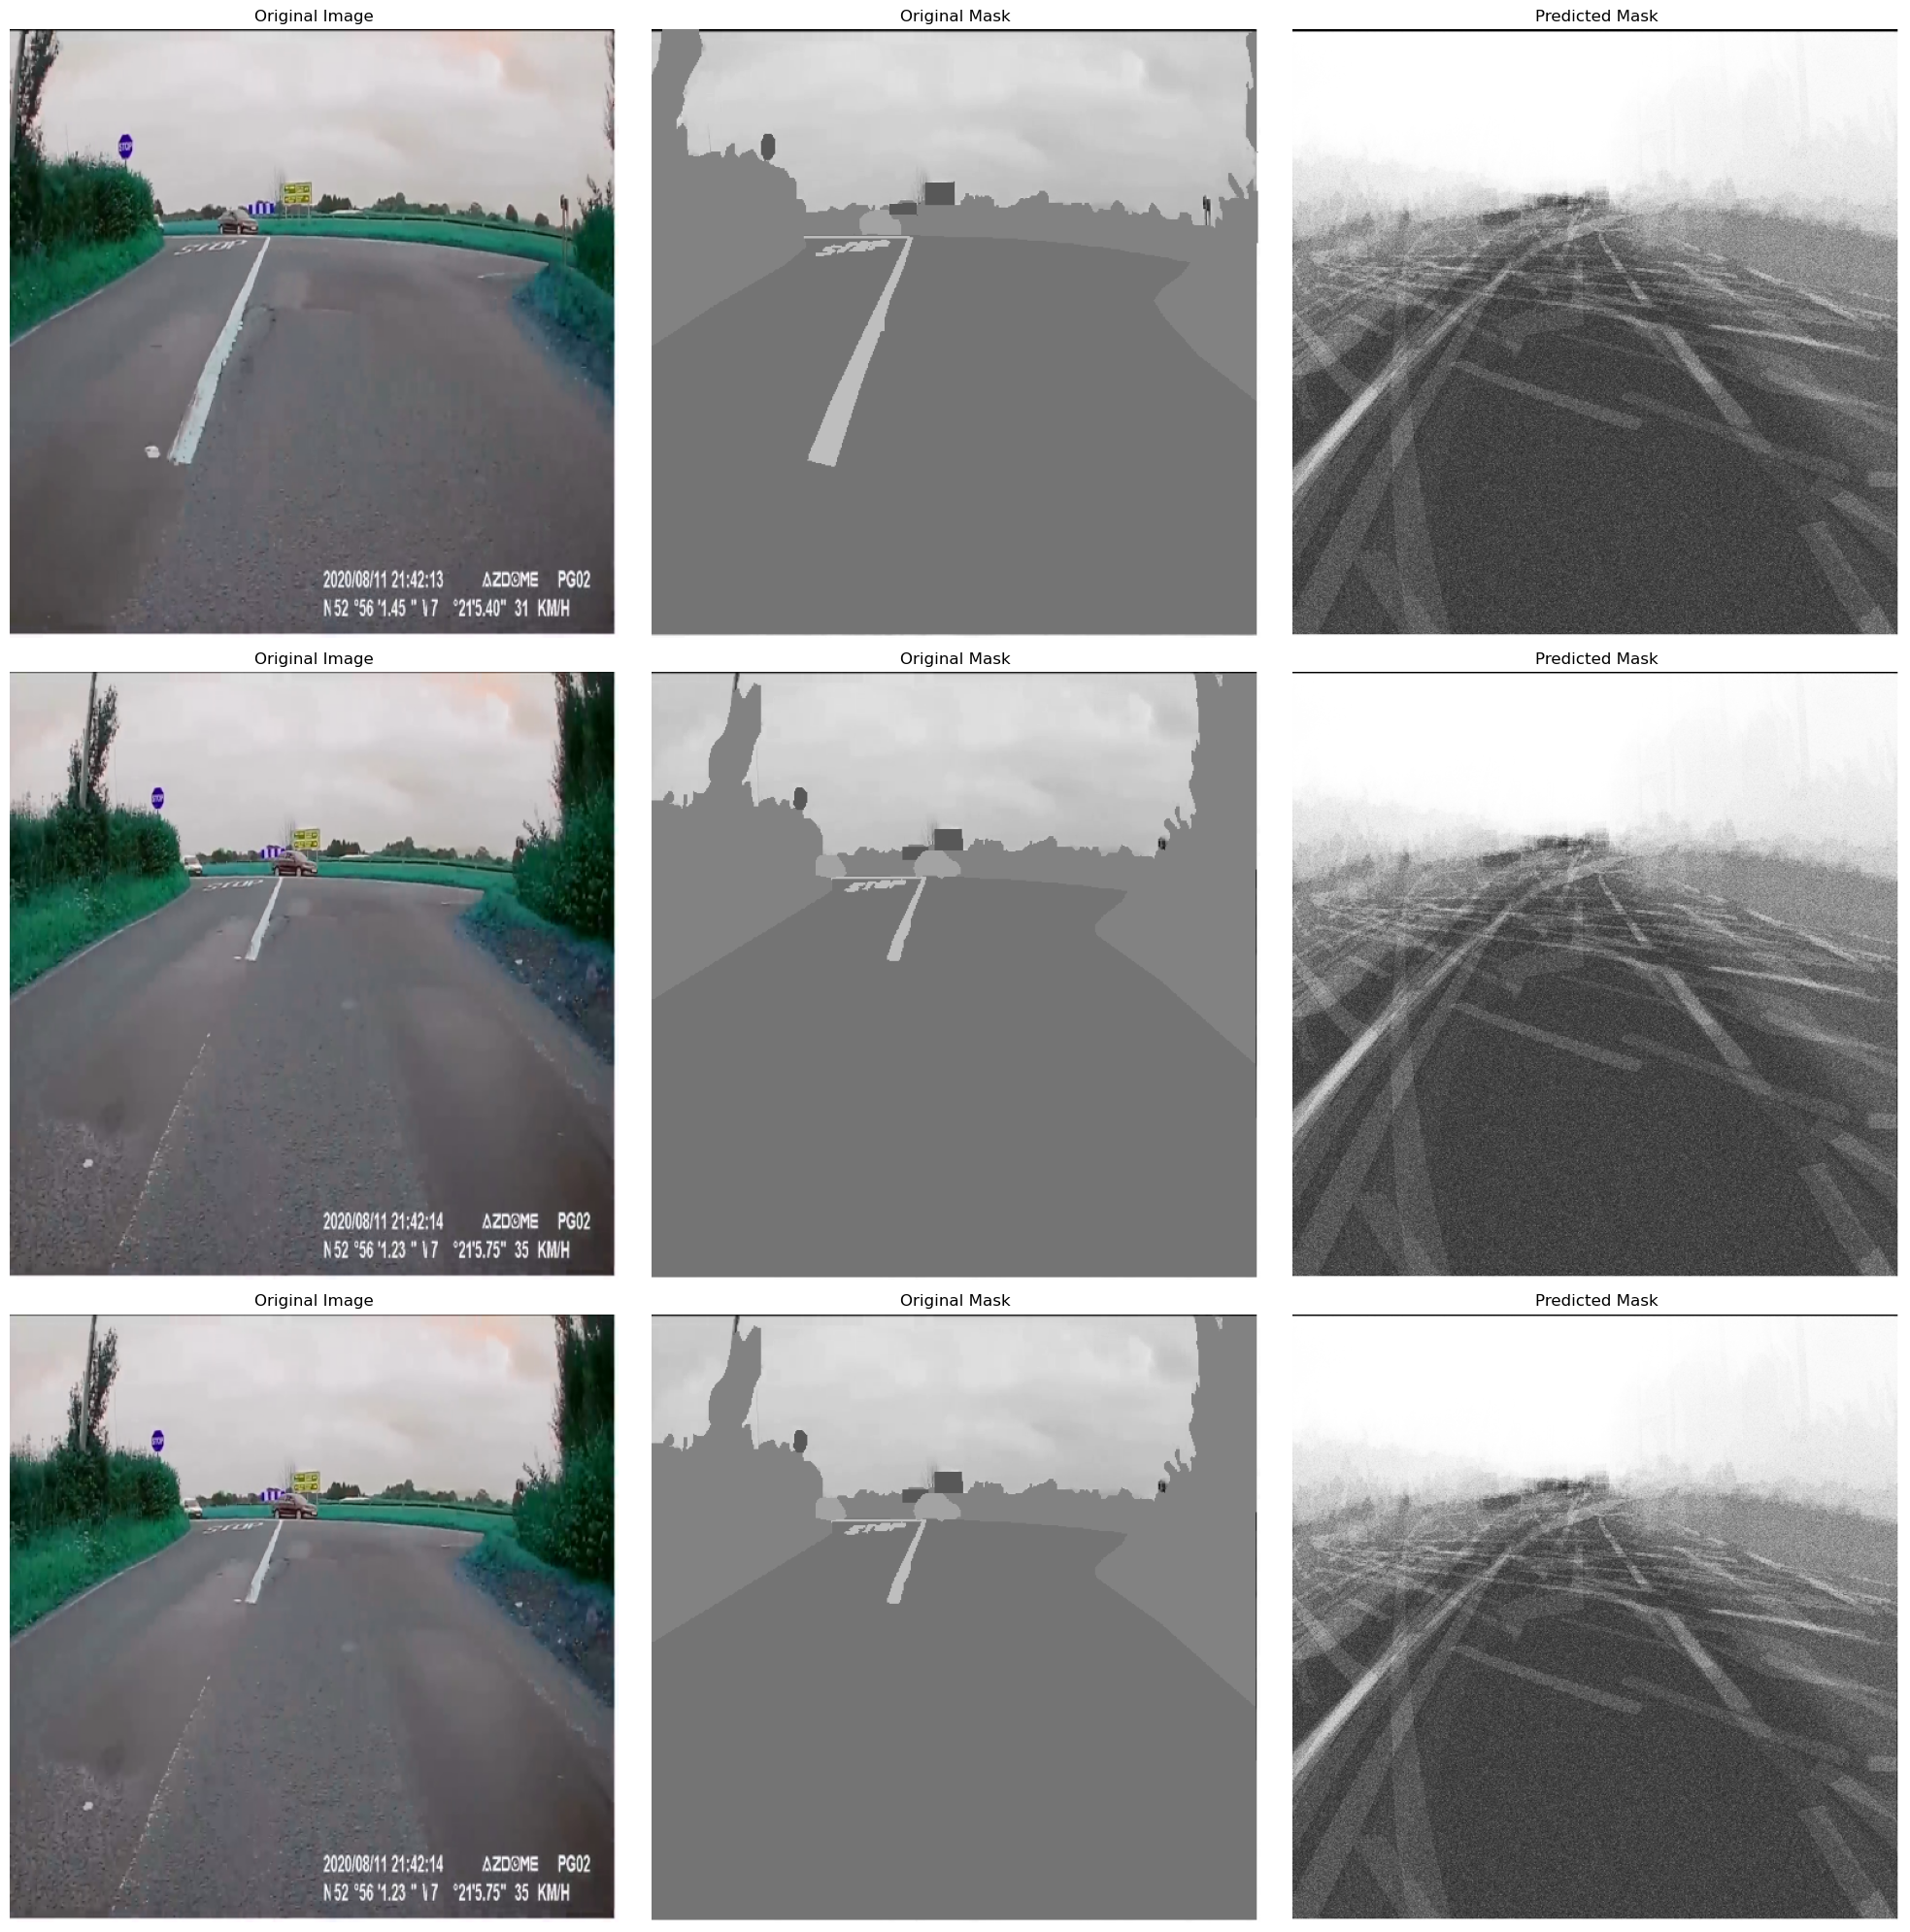

In [1]:
from RoadSegmentation import RoadSegmentation

image_path = 'dataset/road_data/images'
mask_path = 'dataset/road_data/masks'

road_seg = RoadSegmentation(image_path, mask_path)

    # Prepare data
X_train, X_test, y_train, y_test = road_seg.prepare_data()

    # Create and train DeepLabv3 model
road_seg.create_deeplabv3(input_shape=(512, 512, 3))
road_seg.train_model(X_train, y_train, X_test, y_test, epochs=7)

    # Predict and visualize
road_seg.predict_and_visualize(X_test, y_test)